Importing the data

In [ ]:
# importing libraries for data handling and analysis
import pandas as pd
import numpy as np


In [ ]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline


In [ ]:
df = pd.read_csv(
    '/content/output.csv')
df.shape

(400, 26)

In [ ]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc', 'classification_en', 'rbc_normal',
       'pc_normal', 'pcc_present', 'ba_present', 'htn_yes', 'dm_yes',
       'cad_yes', 'appet_poor', 'pe_yes', 'ane_yes'],
      dtype='object')

In [ ]:
ckd = df['classification_en']

In [ ]:
df = df.drop('classification_en', axis=1)

In [ ]:
df['ckd'] = ckd

Feature Selection

<Axes: >

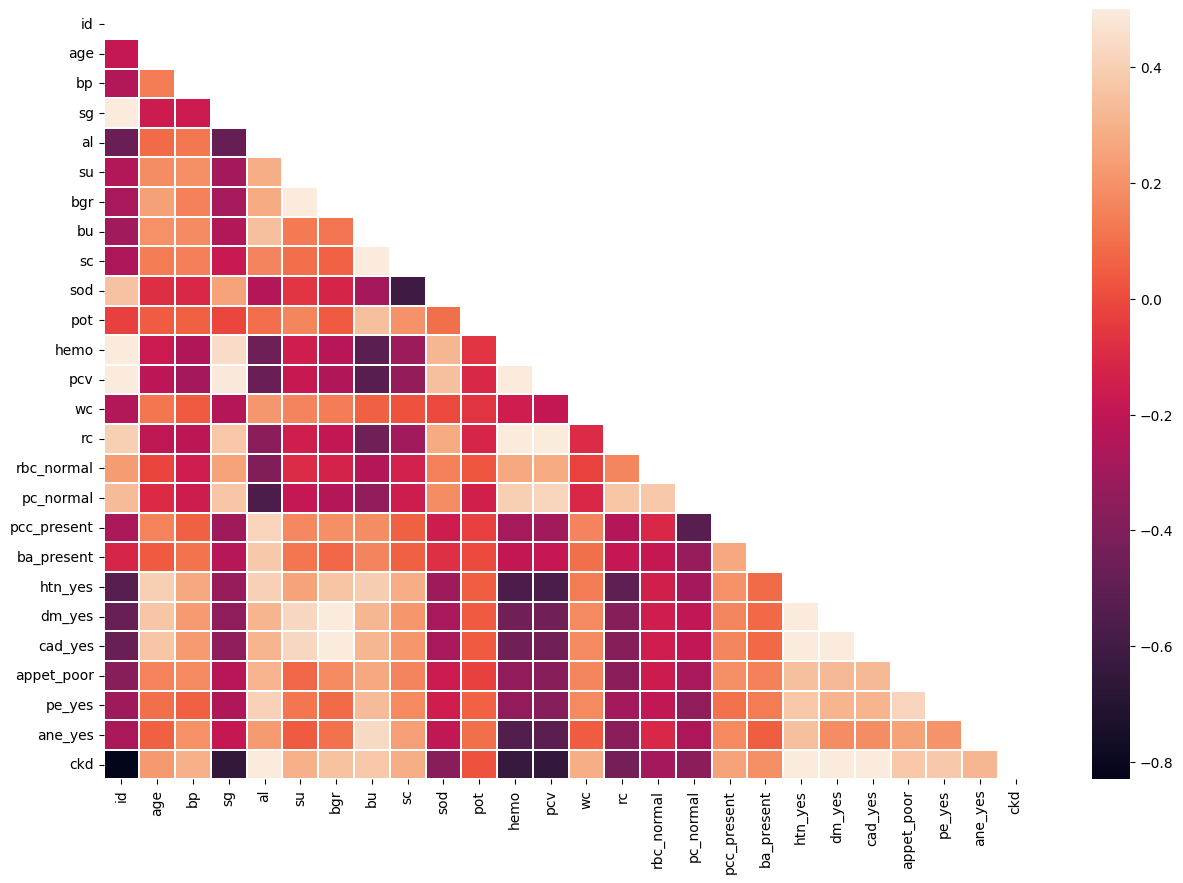

In [ ]:
#Feature Selection
# Calculate correlations
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2)

In [ ]:
df.corr()['ckd'].sort_values()

id            -0.830457
sg            -0.652639
pcv           -0.648769
hemo          -0.633329
rc            -0.433394
sod           -0.376463
pc_normal     -0.366038
rbc_normal    -0.285665
pot            0.018306
ba_present     0.188869
age            0.220131
pcc_present    0.251349
sc             0.291104
wc             0.291822
su             0.297706
bp             0.297955
ane_yes        0.314452
bgr            0.354407
appet_poor     0.372031
bu             0.372589
pe_yes         0.379167
al             0.529393
dm_yes         0.543332
cad_yes        0.543332
htn_yes        0.575387
ckd            1.000000
Name: ckd, dtype: float64

rbc_normal, pot,ba_present, age , pcc_present are less correlated

In [ ]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,ckd
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.675000,76.575000,1.017712,0.90000,0.395000,142.642500,56.883000,2.992875,136.978750,...,0.810000,0.105000,0.055000,0.367500,0.34250,0.34250,0.205000,0.190000,0.150000,0.620000
std,115.614301,17.022008,13.489785,0.005434,1.31313,1.040038,76.344226,49.345921,5.630207,9.263352,...,0.392792,0.306937,0.228266,0.482728,0.47514,0.47514,0.404207,0.392792,0.357519,0.485994
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,99.000000,27.000000,0.900000,135.000000,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,80.000000,1.020000,0.00000,0.000000,114.500000,44.000000,1.200000,136.000000,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,1.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,...,1.000000,0.000000,0.000000,1.000000,1.00000,1.00000,0.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


Feature Scaling

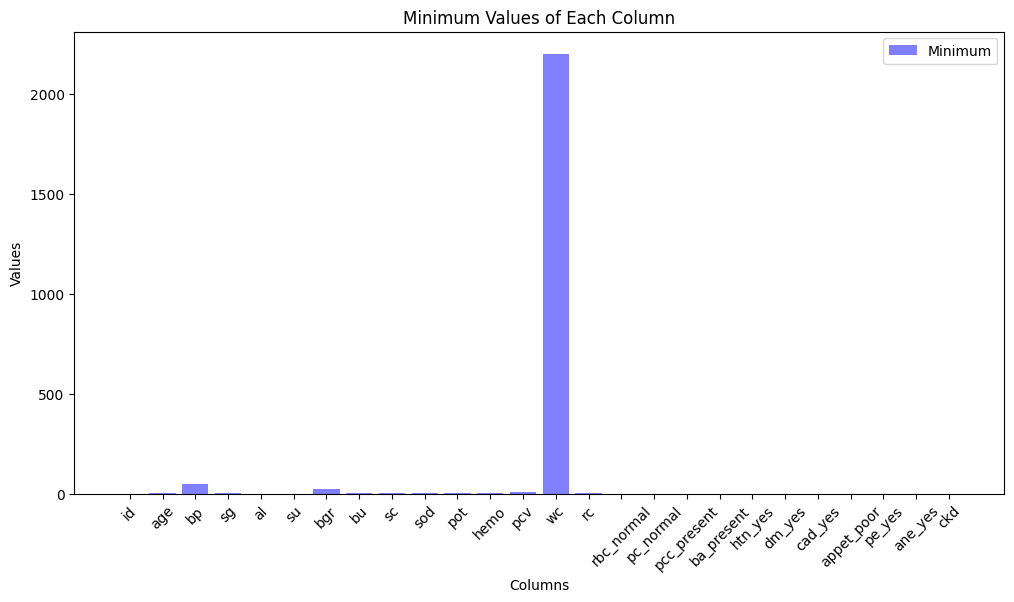

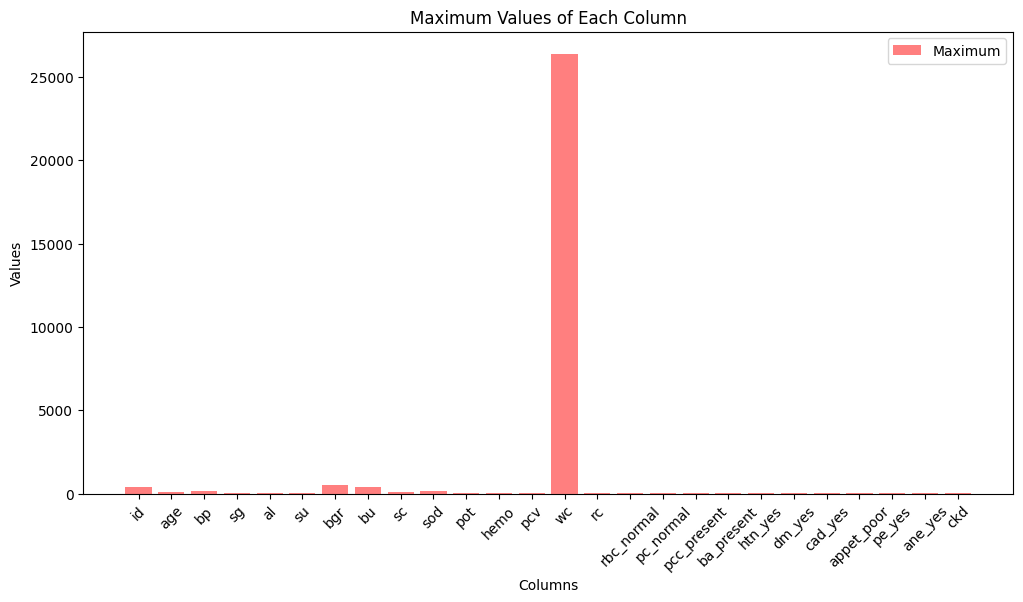

In [ ]:
import matplotlib.pyplot as plt

# Calculate minimum and maximum values for each column
min_values = df.min()
max_values = df.max()

# Plotting minimum values
plt.figure(figsize=(12, 6))
plt.bar(min_values.index, min_values.values, color='blue', alpha=0.5, label='Minimum')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Minimum Values of Each Column')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plotting maximum values
plt.figure(figsize=(12, 6))
plt.bar(max_values.index, max_values.values, color='red', alpha=0.5, label='Maximum')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Maximum Values of Each Column')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [ ]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
cols = list(df.columns)
cols.remove('ckd')
for col in cols:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['ckd'] = pd.to_numeric(df['ckd'], downcast='float')
df.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,ckd
0,0.000000,2.613636,1.153846,3.75,1.0,0.0,1.057692,0.442875,0.052910,4.116719,...,5.0,0.0,0.0,5.0,5.0,5.0,0.0,0.0,0.0,1.0
1,0.012531,0.284091,0.000000,3.75,4.0,0.0,0.822650,0.211810,0.026455,4.116719,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.025063,3.409091,1.153846,1.25,2.0,3.0,4.284188,0.661104,0.092593,4.116719,...,5.0,0.0,0.0,0.0,5.0,5.0,5.0,0.0,5.0,1.0
3,0.037594,2.613636,0.769231,0.00,4.0,0.0,1.014957,0.699615,0.224868,3.359621,...,0.0,5.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,1.0
4,0.050125,2.784091,1.153846,1.25,2.0,0.0,0.897436,0.314506,0.066138,4.116719,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.head(5)

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,ckd
0,0.000000,2.613636,1.153846,3.75,1.0,0.0,1.057692,0.442875,0.052910,4.116719,...,5.0,0.0,0.0,5.0,5.0,5.0,0.0,0.0,0.0,1.0
1,0.012531,0.284091,0.000000,3.75,4.0,0.0,0.822650,0.211810,0.026455,4.116719,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.025063,3.409091,1.153846,1.25,2.0,3.0,4.284188,0.661104,0.092593,4.116719,...,5.0,0.0,0.0,0.0,5.0,5.0,5.0,0.0,5.0,1.0
3,0.037594,2.613636,0.769231,0.00,4.0,0.0,1.014957,0.699615,0.224868,3.359621,...,0.0,5.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,1.0
4,0.050125,2.784091,1.153846,1.25,2.0,0.0,0.897436,0.314506,0.066138,4.116719,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
target = df['ckd'].copy()

In [ ]:
# let's remove the target feature and redundant features from the dataset
df.drop(['id', 'ckd'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df.shape))

Size of Full dataset is: (400, 24)


In [ ]:
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,2.613636,1.153846,3.75,1.0,0.0,1.057692,0.442875,0.052910,4.116719,0.11236,...,5.0,5.0,0.0,0.0,5.0,5.0,5.0,0.0,0.0,0.0
1,0.284091,0.000000,3.75,4.0,0.0,0.822650,0.211810,0.026455,4.116719,0.11236,...,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.409091,1.153846,1.25,2.0,3.0,4.284188,0.661104,0.092593,4.116719,0.11236,...,5.0,5.0,0.0,0.0,0.0,5.0,5.0,5.0,0.0,5.0
3,2.613636,0.769231,0.00,4.0,0.0,1.014957,0.699615,0.224868,3.359621,0.00000,...,5.0,0.0,5.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0
4,2.784091,1.153846,1.25,2.0,0.0,0.897436,0.314506,0.066138,4.116719,0.11236,...,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Splitting Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (300, 24)
Number transactions y_train dataset:  (300,)
Number transactions X_test dataset:  (100, 24)
Number transactions y_test dataset:  (100,)


Building Models

Logistic Regression

In [ ]:
lr = LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')
lr.fit(X_train,y_train)
Y_pred = lr.predict(X_test)


In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test,Y_pred)

array([[36,  2],
       [ 2, 60]])

In [ ]:
print(metrics.accuracy_score(y_test,Y_pred))

0.96


In [ ]:
from sklearn.model_selection import KFold
kfold = model_selection.KFold(
        n_splits=10)  # 10-fold cross-validation

cv_acc_results =model_selection.cross_val_score( lr, X_train, y_train, cv=kfold, scoring='accuracy')
cv_auc_results = model_selection.cross_val_score(lr, X_train, y_train, cv=kfold, scoring='roc_auc')

In [ ]:
print(cv_acc_results)

[0.93333333 1.         0.96666667 0.96666667 1.         0.93333333
 0.93333333 1.         0.96666667 1.        ]


In [ ]:
print("AUC score (STD): %.2f (%.2f)" % (cv_auc_results.mean(), cv_auc_results.std()))

AUC score (STD): 1.00 (0.00)


Text(0.5, 427.9555555555555, 'Predicted label')

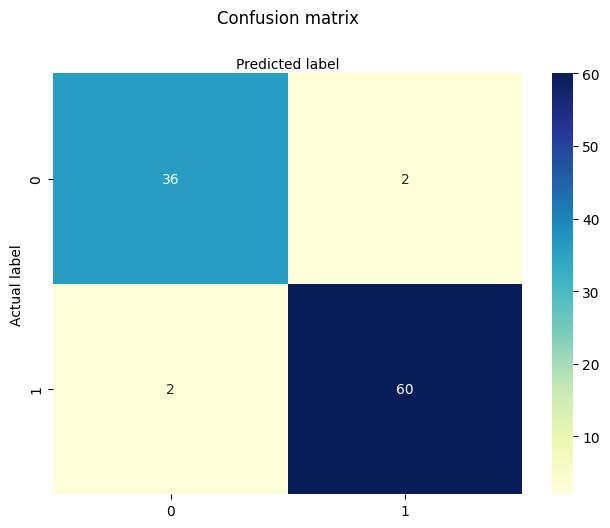

In [ ]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, Y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(metrics.classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        38
         1.0       0.97      0.97      0.97        62

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



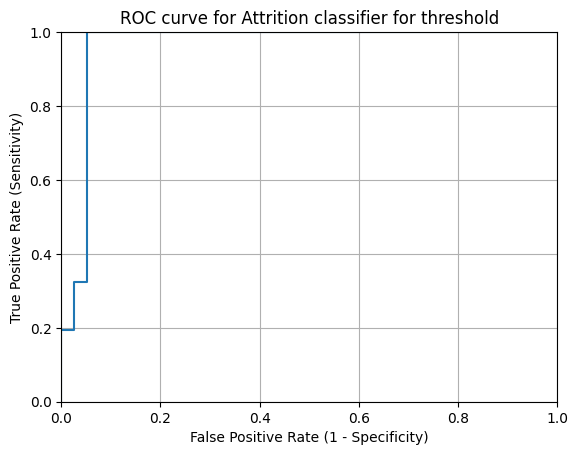

In [ ]:
from sklearn.preprocessing import binarize
# store the predicted probabilities for class 1
y_pred_prob = lr.predict_proba(X_test)[:, 1]
y_pred_class = binarize([y_pred_prob], threshold=0.3)
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Attrition classifier for threshold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

KNN

In [ ]:
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
Y_pred = kn.predict(X_test)
from sklearn import metrics
metrics.confusion_matrix(y_test,Y_pred)

array([[36,  2],
       [ 1, 61]])

In [1]:
print(metrics.accuracy_score(y_test,Y_pred))r

NameError: name 'metrics' is not defined

**Logistic Regression:**

* Accuracy: 0.98
* AUC score: 0.99

**KNN:**

* Accuracy: 0.96
* AUC score: 0.98

Based on these results, the Logistic Regression model appears to be the best performing model for this dataset. It has a higher accuracy and good AUC score than the KNN model.